# [Module 0.1]  데이터 탐색

이 노트북은 아래와 같은 작업을 합니다.

- 1. 환경 설정
- 2. 데이터 세트 로딩
    - 전체 데이터인 1억 8천만 건에서 약 1%를 랜덤 샘플링하여 대상으로 합니다. 
    
- 3. 데이터 세트 정리 및 필요 컴럼 추가
- 4. 데이터 탐색

---

# 1. 환경 설정

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%store -r

In [3]:
import pandas as pd
import os
from IPython.display import display as dp

data_folder = '../../../data/AdTalking'

# 2. 데이터 세트 로딩

- 아래는 데이터 로딩을 위해서 9.6 GB 가 필요합니다. 메모리 할당 에러가 나면 다른 노트북의 커널 세션을 삭제하고 해보세요. 그래도 안되면 메모리가 많은 노트북 인스턴스에서 다시 하시기 바랍니다.

- 약 2분 소요

In [4]:
%%time

file = 'train.csv'
file_path = os.path.join(data_folder, file)

df_raw = pd.read_csv(file_path, parse_dates=['click_time'])
df_raw.head()

CPU times: user 1min 24s, sys: 10.2 s, total: 1min 35s
Wall time: 1min 35s


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184903890 entries, 0 to 184903889
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ip               int64         
 1   app              int64         
 2   device           int64         
 3   os               int64         
 4   channel          int64         
 5   click_time       datetime64[ns]
 6   attributed_time  object        
 7   is_attributed    int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 11.0+ GB


## 데이터 샘플링

In [6]:
sampling_rate = 0.01
df = df_raw.sample(frac=sampling_rate, random_state=100)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849039 entries, 71816445 to 24081847
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ip               int64         
 1   app              int64         
 2   device           int64         
 3   os               int64         
 4   channel          int64         
 5   click_time       datetime64[ns]
 6   attributed_time  object        
 7   is_attributed    int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 127.0+ MB


# 3. 데이터 세트 정리 및 필요 컴럼 추가

## 불필요 컬럼 드랍
- attributed_time 는 널 데이터가 많아서 사용하지 않음

In [8]:
from src.p_utils import drop_column

df = drop_column(df, col='attributed_time')

## 컬럼 이름 변경
- 아래의 레이블 및 click_time은 AFD 에서 지정한 컬럼 이름으로 변경 합니다.

In [9]:
df = df.rename(columns={'is_attributed':'EVENT_LABEL'})    
df = df.rename(columns={'click_time':'EVENT_TIMESTAMP'})    


## 코드 데이터 (예: OS) 문자형 으로 변경
- 숫자값에 'str' 를 넣어서 명시적으로 스트링으로 타입 변환
이유는 csv로 데이터 프레임을 저장시에, string 타입이 일반 숫자형 타입으로 변경이 되어서 명시적으로 스트링으로 변경 함.

In [10]:
from src.p_utils import change_code_to_string

df = change_code_to_string(df, col='ip', new_col='str_ip', verbose=False)
df = change_code_to_string(df, col='app', new_col='str_app', verbose=False)
df = change_code_to_string(df, col='device', new_col='str_device', verbose=False)
df = change_code_to_string(df, col='os', new_col='str_os', verbose=False)
df = change_code_to_string(df, col='channel', new_col='str_channel', verbose=False)



### 기존 컬럼 삭제
- 위에서 같은 내용의 컬럼을 추가해서, 기존 컬럼은 삭제 함.

In [11]:
df = drop_column(df, col='ip')
df = drop_column(df, col='app')
df = drop_column(df, col='device')
df = drop_column(df, col='os')
df = drop_column(df, col='channel')

## 날짜 타입 변수 추가

In [12]:
from datetime import datetime

from src.p_utils import create_datetype_cols


df = create_datetype_cols(df, source_col='EVENT_TIMESTAMP', target_col='EVENT_TIMESTAMP_SIMPLE')
df.head()    

,str_ip,str_app,str_device,str_os,str_channel,EVENT_TIMESTAMP,EVENT_LABEL,EVENT_TIMESTAMP_SIMPLE
71816445,str_103106,str_3,str_1,str_13,str_371,2017-11-08 00:49:06,0,2017-11-08 00:00:00
118420665,str_83928,str_3,str_1,str_19,str_417,2017-11-08 14:54:59,0,2017-11-08 14:00:00
2983188,str_36150,str_15,str_2,str_49,str_3,2017-11-06 17:27:10,0,2017-11-06 17:00:00
111499266,str_40056,str_26,str_1,str_18,str_477,2017-11-08 13:00:46,0,2017-11-08 13:00:00
1598682,str_39081,str_18,str_1,str_8,str_107,2017-11-06 16:37:52,0,2017-11-06 16:00:00


# 4. 데이터 탐색

### 레이블 분포와 프로드 비율 확인

In [13]:
df.EVENT_LABEL.value_counts()

0    1844455
1       4584
Name: EVENT_LABEL, dtype: int64

프로드 비율이 약 0.002 로서 전체 1억 8천건가 유사한 프로드 비율입니다.

In [14]:
df.EVENT_LABEL.value_counts()[1] / df.shape[0]

0.0024791256431043367

In [15]:
df.nunique()

str_ip                     96593
str_app                      324
str_device                   606
str_os                       230
str_channel                  174
EVENT_TIMESTAMP           248145
EVENT_LABEL                    2
EVENT_TIMESTAMP_SIMPLE        74
dtype: int64

## 카테고리 변수 분포

In [16]:
df.columns

Index(['str_ip', 'str_app', 'str_device', 'str_os', 'str_channel',
       'EVENT_TIMESTAMP', 'EVENT_LABEL', 'EVENT_TIMESTAMP_SIMPLE'],
      dtype='object')


str_5348     12450
str_5314     11634
str_73516     7775
str_73487     7742
str_53454     5117
Name: str_ip, dtype: int64

str_3     339736
str_12    241534
str_2     216890
str_9     164224
str_15    159830
Name: str_app, dtype: int64

str_1       1743374
str_2         80889
str_0         10443
str_3032       6822
str_3543       2721
Name: str_device, dtype: int64

str_19    441495
str_13    397932
str_17     96249
str_18     89485
str_22     74006
Name: str_os, dtype: int64

str_280    151013
str_245     88453
str_107     84458
str_477     72049
str_134     59173
Name: str_channel, dtype: int64


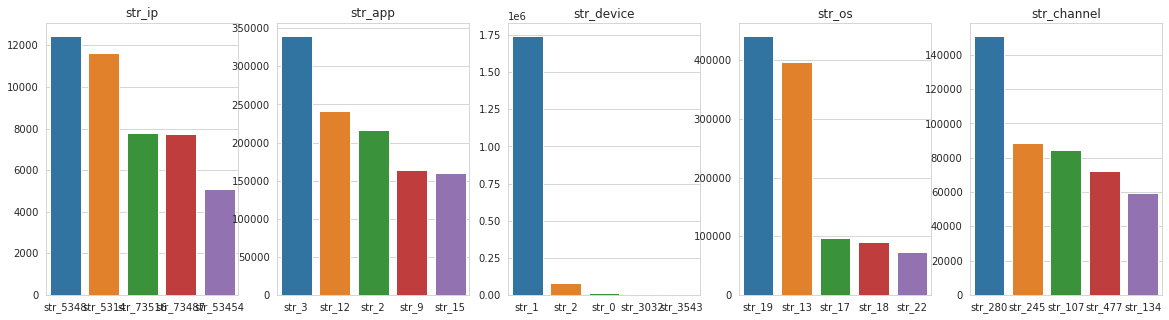

In [17]:
from src.p_utils import display_category_dist


cols = ['str_ip', 'str_app', 'str_device', 'str_os', 'str_channel']
# display_category_dist(df, cols=cols, top_num=5, verbose=False)
display_category_dist(df, cols=cols, top_num=5, verbose=True)

## 시간(Hour) 순으로 프로드 비율 차트

- 2017-11-17 이 4개의 구간으로 분리 (6시간 간격) 되어 있습니다. 4개의 간격이 뚜렷한 패턴이 있어 보이지 않습니다

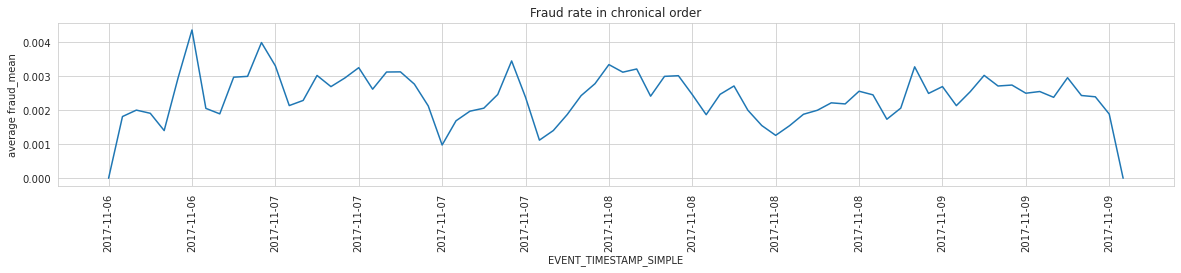

In [18]:
from src.p_utils import show_classes_date

date_chart_params = {
            "frac" : 1.0, 
            "xticks" : 6,
            "target_col" : 'EVENT_TIMESTAMP_SIMPLE',         
           "label_col" : 'EVENT_LABEL',
            "FigSizeW" : 20,    
            "FigSizeH": 3,     
            "title" : "Fraud rate in chronical order"
         }


show_classes_date(df, date_chart_params)

# 피쳐와 레이블과 상관 관계

In [19]:
from src.p_utils import plot_cor_feature_label

### IP Address

- 오른쪽 Y축이 프로드의 비율입니다. 빨간색으로 횡선이 1인 것득은 해당 IP가 모두 프로드라는 것을 의미합니다.

/home/ec2-user/SageMaker/fraud-detector-workshop/code/phase0/prepare_data/src/p_utils.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:num], rotation='vertical')


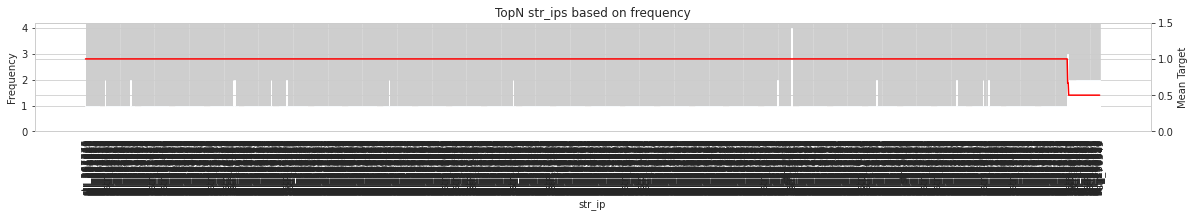

In [20]:
cor_chart_params = {
            "target_col" : 'str_ip',     
            "num_x_items" : 2000, 
           "label_col" : 'EVENT_LABEL',
            "FigSizeW" : 20,    
            "FigSizeH": 2,            
         }

plot_cor_feature_label(df, cor_chart_params)

### APP

/home/ec2-user/SageMaker/fraud-detector-workshop/code/phase0/prepare_data/src/p_utils.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:num], rotation='vertical')


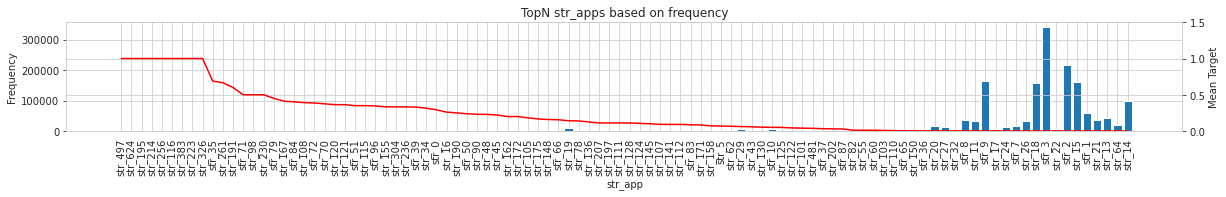

In [21]:
cor_chart_params = {
            "target_col" : 'str_app',     
            "num_x_items" : 100, 
           "label_col" : 'EVENT_LABEL',
            "FigSizeW" : 20,    
            "FigSizeH": 2,            
         }

plot_cor_feature_label(df, cor_chart_params)

### Device

/home/ec2-user/SageMaker/fraud-detector-workshop/code/phase0/prepare_data/src/p_utils.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:num], rotation='vertical')


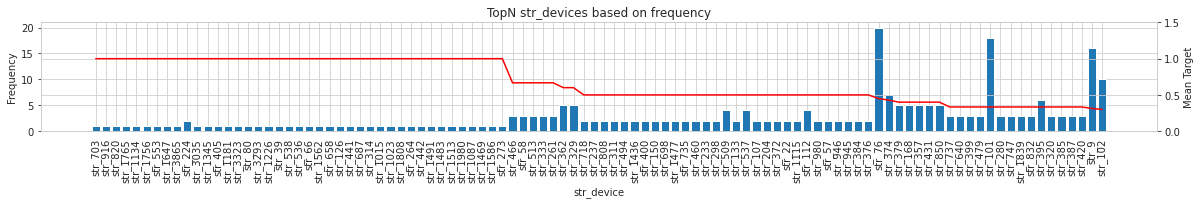

In [22]:
cor_chart_params = {
            "target_col" : 'str_device',     
            "num_x_items" : 100, 
           "label_col" : 'EVENT_LABEL',
            "FigSizeW" : 20,    
            "FigSizeH": 2,            
         }

plot_cor_feature_label(df, cor_chart_params)

### OS

/home/ec2-user/SageMaker/fraud-detector-workshop/code/phase0/prepare_data/src/p_utils.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:num], rotation='vertical')


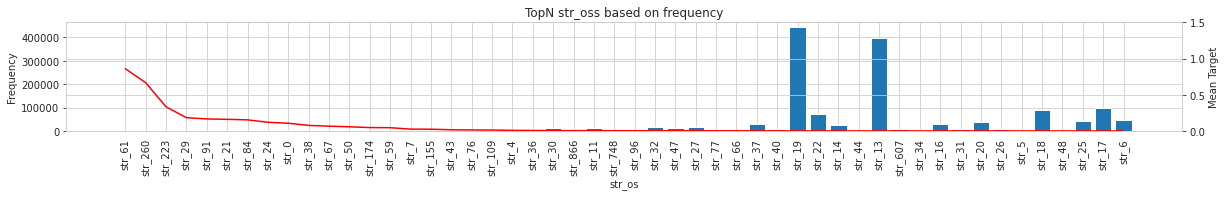

In [23]:
cor_chart_params = {
            "target_col" : 'str_os',     
            "num_x_items" : 50, 
           "label_col" : 'EVENT_LABEL',
            "FigSizeW" : 20,    
            "FigSizeH": 2,            
         }

plot_cor_feature_label(df, cor_chart_params)

### Channel

/home/ec2-user/SageMaker/fraud-detector-workshop/code/phase0/prepare_data/src/p_utils.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:num], rotation='vertical')


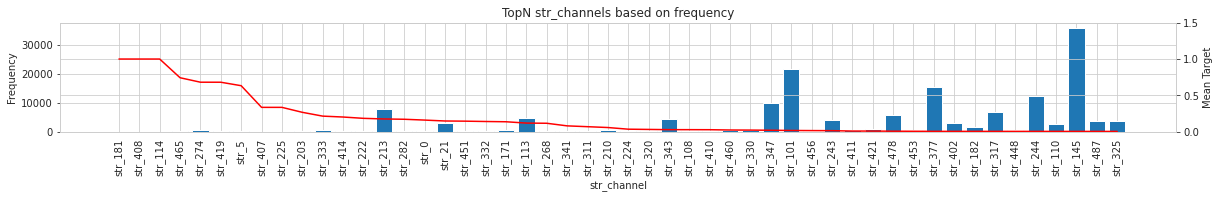

In [24]:
cor_chart_params = {
            "target_col" : 'str_channel',     
            "num_x_items" : 50, 
           "label_col" : 'EVENT_LABEL',
            "FigSizeW" : 20,    
            "FigSizeH": 2,            
         }

plot_cor_feature_label(df, cor_chart_params)